# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Searborn for regression plot
!pip install seaborn
import seaborn as sns

#converting image into arrays
from PIL import Image

# Libraries needed for visualizing waffle chart
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

# Read Dataset

In [2]:
df_canada = pd.read_excel(
    'data/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

## Data Preparation

In [3]:
# remove unnecessary columns
df_canada.drop(
    ['AREA','REG','DEV','Type','Coverage'],
    axis=1,
    inplace=True
)
# Rename the columns
df_canada.rename(
    columns={
        'OdName':'Country',
        'AreaName':'Continent',
        'RegName':'Region',
    },
    inplace=True
)
# For consistency purpose, convert all columns label as string
df_canada.columns = list(map(str,df_canada.columns))

# Menjadi 'Country' sebagai index
df_canada.set_index('Country',inplace=True)

# Menambahkan kolom 'Total' yang merupakan total imigran menurut negara selama periode(1980-2013)
df_canada['Total'] = df_canada[[str(i) for i in range(1980,2014)]].sum(axis=1)

# generate rentang tahun
years = list(map(str,range(1980,2014)))

# Waffle Charts

## Definition
***
**Waffle Chart** adalah visualisasi yang biasanya dibuat untuk menampilkan progress menuju tujuan. Chart ini sebagai opsi yang efektif saat ingin menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dashbord Excel. <br>

*Cons* <br>
Sayangnya waffle chart tidak built in dalam pustaka Python, sehingga perlu algoritma untuk membuatnya dari awal. <br>
Algoritma untuk membuat waffle chart : <br>
1. Menentukan proporsi setiap kategori sehubungan dengan totalnya
2. Menentukan ukuran keseluruhan dari waffle chart
3. Menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori
4. Membuat matriks yang menyerupai waffle dan mengisinya

## Case Study
***
What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013? <br>
Try to use this data to understand waffle chart

In [4]:
countries = ['Denmark','Norway', 'Sweden']
years = years
df_dns = df_canada.loc[countries,:]

In [5]:
df_dns.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


## Try to make Waffle Chart from Scratch

### Menentukan proporsi setiap kategori sehubungan dengan totalnya ('Total')

In [6]:
sum_total_values = sum(df_dns['Total'])
# Compute proportion of each category with respect to the total
category_proportions = [
    float(val)/sum_total_values for val in df_dns['Total']
]
for i,proportions in enumerate(category_proportions):
    print('Category {} = {}'.format(df_dns.index.values[i],proportions))

Category Denmark = 0.32255663965602777
Category Norway = 0.1924094592359848
Category Sweden = 0.48503390110798744


### Menentukan ukuran keseluruhan dari waffle chart (width,height)

In [7]:
width = 40 # width of waffle chart
height = 10 # height of waffle chart

total_number_of_ubins = width*height

### Menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [8]:
# Pembulatan dari proporsi tiap kategori terhadap total ubin yang tersedia
ubins_per_category = [round(proportion*total_number_of_ubins) for proportion in category_proportions]

# Cetak ubin yang diperlukan untuk setiap kategori (Denmark, Norway, Sweeden)
for i, ubin in enumerate(ubins_per_category):
    print('Category {} = {} ubin'.format(df_dns.index.values[i],ubin))

Category Denmark = 129 ubin
Category Norway = 77 ubin
Category Sweden = 194 ubin


### Buat matriks yang menyerupai waffle dan mengisinya

In [9]:
ubins_per_category[0]

129

In [11]:
# Inisialisasi waffle sebagai matriks kosong dengan ukuran (height x width) --> (baris x kolom)
waffle_chart = np.zeros((height,width))

# Inisialisasi index untuk category dan ubin
category_index = 0
ubin_index = 0

# Penuhi baris dulu baru pindah ke kolom berikutnya
for col in range(width):
    for row in range(height):
        ubin_index+=1
        
        if ubin_index>sum(ubins_per_category[0:category_index]):
            # pindah ke kategori berikutnya
            category_index+=1
        
        #set matriks row,col dengan integer category indexnya
        waffle_chart[row][col] = category_index
        

### Petakan waffle_chart menjadi visual

<Figure size 432x288 with 0 Axes>

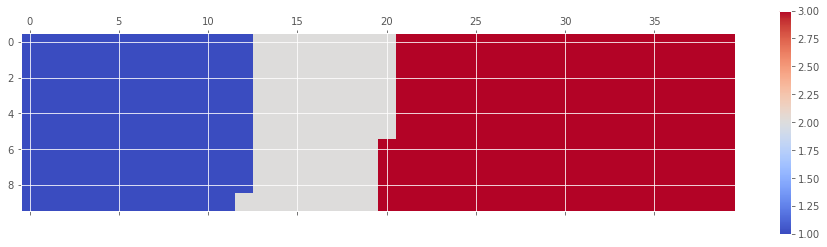

In [12]:
fig = plt.figure()

# gunakan matshow untuk menampilkan waffle_chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

### Percantik Chart

([], [])

<Figure size 432x288 with 0 Axes>

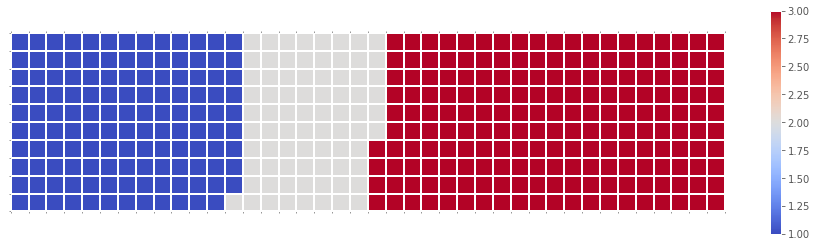

In [13]:
fig = plt.figure()

# gunakan matshow untuk menampilkan waffle_chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()
# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

### Tambahkan Legend

<Figure size 432x288 with 0 Axes>

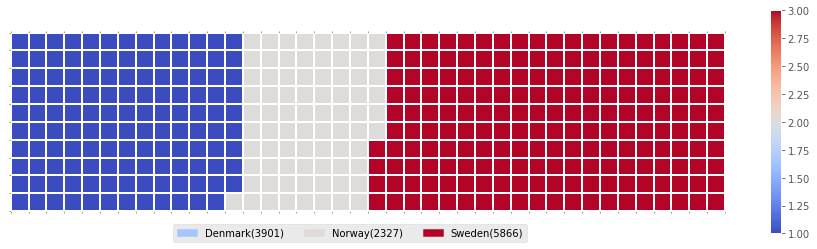

In [14]:
fig = plt.figure()

# gunakan matshow untuk menampilkan waffle_chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()
# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Compute cummulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum)-1] #ambil total nilai dari element terakhir values_cumsum

# Create legend
legend_handles =[]
for i, category in enumerate(df_dns.index.values):
    label_str = category+'('+str(df_dns['Total'][i])+')'
    color_val = colormap(
        float(values_cumsum[i])/total_values
    )
    legend_handles.append(mpatches.Patch(color=color_val,label=label_str))

# Add legend to chart
plt.legend(
    handles=legend_handles,
    loc='lower center',
    ncol = len(df_dns.index.values),
    bbox_to_anchor=(0.,-0.2,0.95,.1)
)
    


# Word Clouds

## Definitions
***
Word clouds bekerja dengan cara semakin banyak kata tertentu muncul dalam sumber data tekstual, maka semakin **besar** dan **tebal** kata itu muncul di kata cloud. <br>
Package bernama **word_cloud** di Python menyediakan cara untuk menghasilkan word clouds. <br>
*Link For Word Cloud Packages*
https://github.com/amueller/word_cloud/
***
## Kegunaan
***
Word Cloud biasanya digunakan untuk analisis tingkat tinggi dan visualisasi data teks. <br>
Contoh kali ini akan dilakukan pada data novel pendek *Alice's Adventures in Wonderland*

## Install the package

In [15]:
!pip install wordcloud

## Import the package

In [16]:
from wordcloud import WordCloud, STOPWORDS

## Import the file (alice_novel.txt) in /data

In [17]:
alice_novel = open('data/alice_novel.txt','r').read()

## Wordcloud Process

### Langkah 1
***
Gunakan STOPWORDS untuk menghapus stopword yang berlebihan

In [18]:
stopwords = set(STOPWORDS)

### Langkah 2
***
Buat word cloud object dan generate word cloud dengan 2000 kata pertama dalam novel. Jumlah kata pertama disini ditentukan agar lebih ringkas

In [19]:
alice_word_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
# Generate the word cloud
alice_word_cloud.generate(alice_novel)

### Langkah 3
***
Visualisasikan word cloud yang sudah dibuat

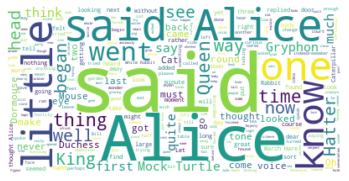

In [20]:
plt.imshow(alice_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Langkah 4
***
Mempercantik word cloud. <br>
Lakukan perubahan ukuran word cloud agar kata-kata yang jarang muncul dapat terlihat dengan baik

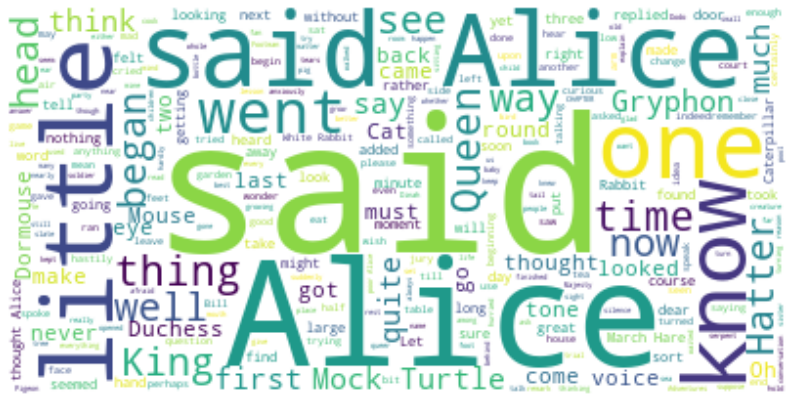

In [21]:
fig = plt.figure()

fig.set_figwidth(14)
fig.set_figheight(18)

# Display the cloud
plt.imshow(alice_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Additional
***
Kata *said* yang muncul pada word cloud tidak informatif, sehingga tambahkan kata 'said' ke dalam stopword lalu ulang generate word cloudnya!

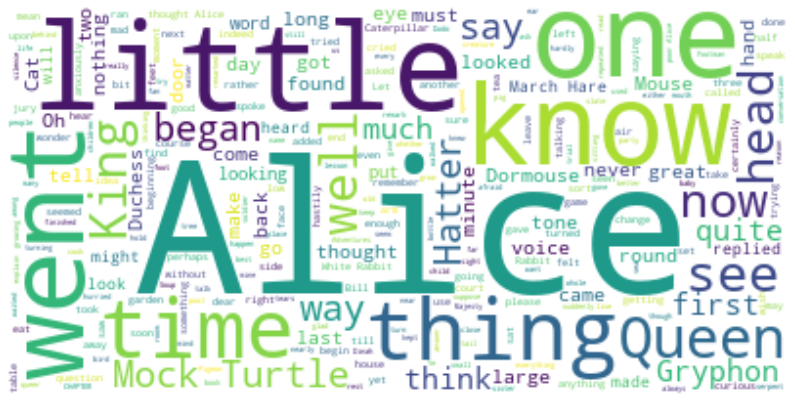

In [22]:
stopwords.add('said')

# Generate the word cloud
alice_word_cloud.generate(alice_novel)

fig = plt.figure()

fig.set_figwidth(14)
fig.set_figheight(18)

# Display the cloud
plt.imshow(alice_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

***
Kita juga bisa menerapkan mask gambar Alice dan kelincinya untuk menjadi wadah word cloud

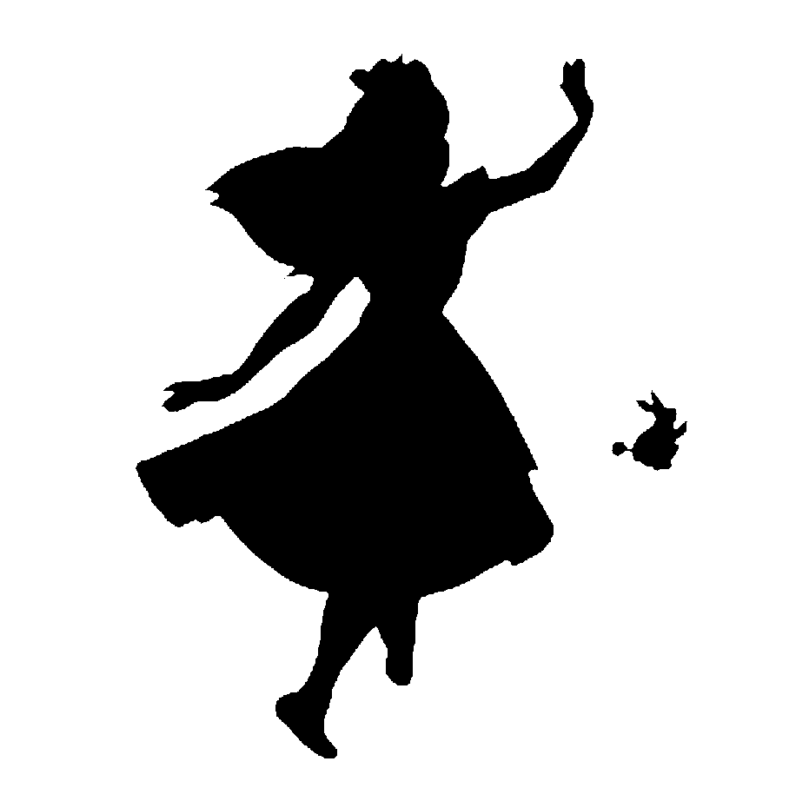

In [23]:
# import the image
alice_mask = np.array(Image.open('data/alice_mask.png'))

# show the masking
fig = plt.figure()

fig.set_figwidth(14)
fig.set_figheight(18)

# Display the cloud
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

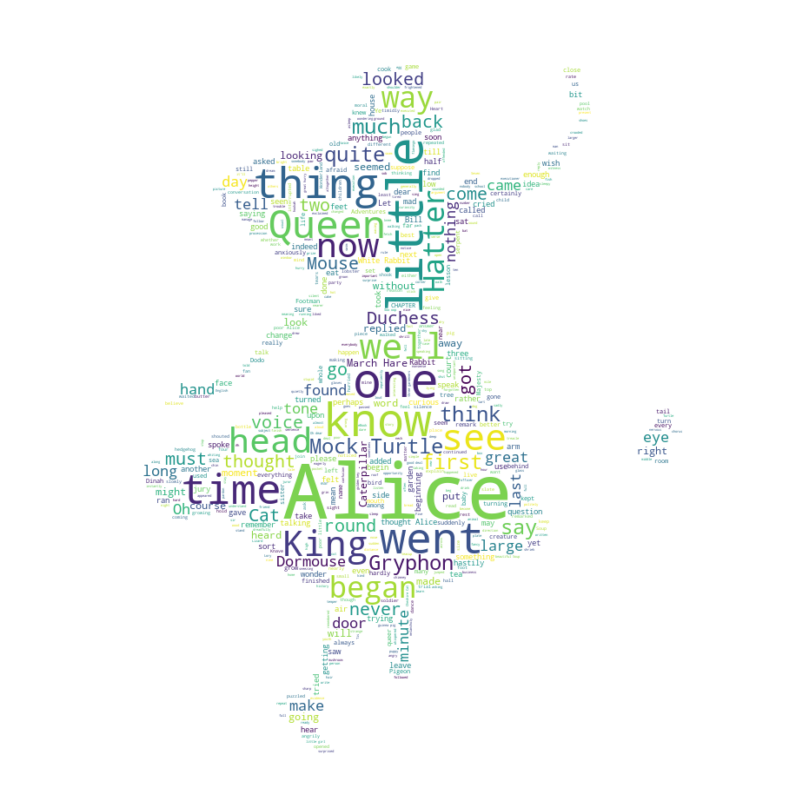

In [24]:
alice_word_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask
)
# Generate the word cloud
alice_word_cloud.generate(alice_novel)

fig = plt.figure()

fig.set_figwidth(14)
fig.set_figheight(18)

# Display the cloud
plt.imshow(alice_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Cloud dengan data Imigrasi Canada

## Load data
***
sayangnya dataset keimigrasian Canada tidak memiliki data teks. <br>
Pada contoh ini akan dibuat data teks 90 kata. <br>
**Task** <br>
Menggunakan 'countries' dengan nama satu kata, duplikatkan nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi

In [25]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [26]:
total_countries = df_canada['Total'].sum()

In [27]:
# Duplikatkan nama masing-masing negara yang terdiri dari satu kata berdasarkan kontribusi mereka terhadap total imigrasi

max_words = 90
word_string = ''

for country in df_canada.index.values:
    # check apakah country terdiri dari 1 kata
    if len(country.split(' ')) == 1:
        repeat_num_country = int(df_canada.loc[country, 'Total']/float(total_countries)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_country)

In [28]:
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

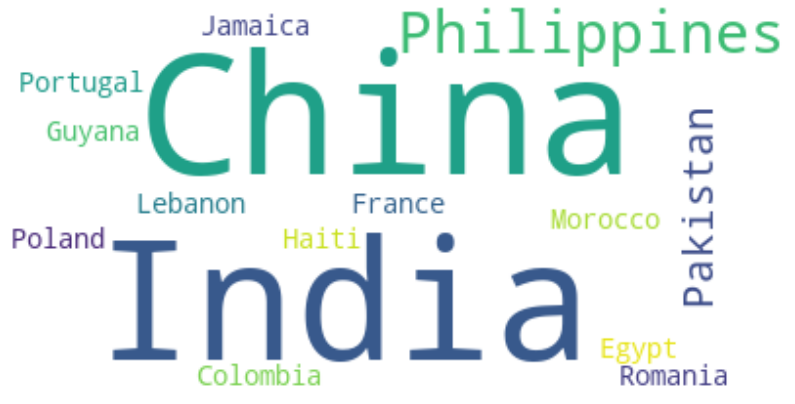

In [29]:
# Create the word cloud
immigration_word_cloud = WordCloud(
    background_color='white'
)
immigration_word_cloud.generate(word_string)

fig = plt.figure()

fig.set_figwidth(14)
fig.set_figheight(18)

# Display the cloud
plt.imshow(immigration_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plot

## Langkah 1
***
Import seaborn

## Langkah 2
***
Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun 1980 - 2013

In [30]:
df_new_canada = pd.DataFrame(df_canada[years].sum(axis=0))

# map the year index to float (useful for regression later on)
df_new_canada.index = map(float,df_new_canada.index)

# reset year index for column
df_new_canada.reset_index(inplace=True)

# Rename the columns
df_new_canada.columns = ['years','Total']


## Buat model regression

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

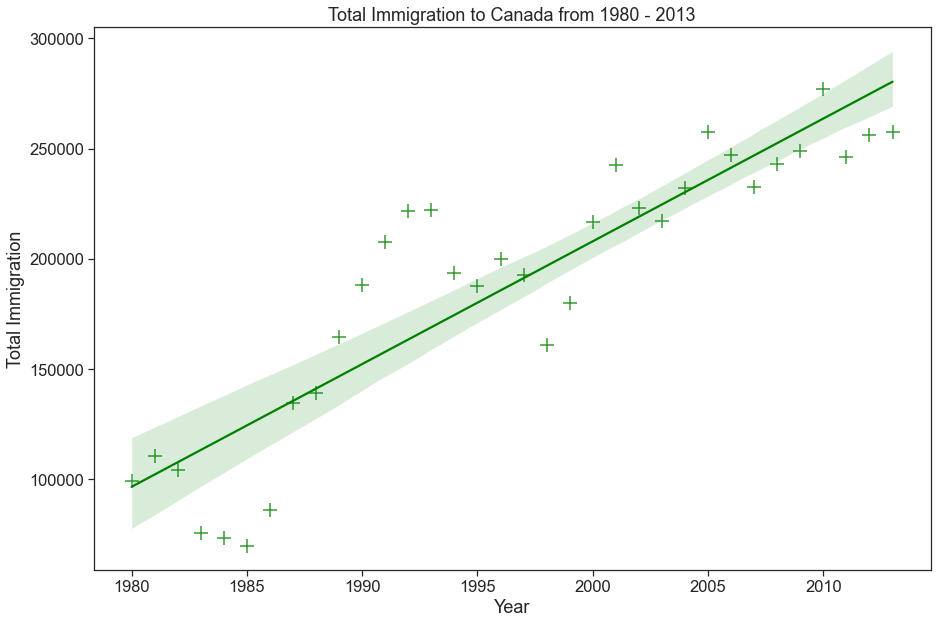

In [31]:
plt.figure(figsize=(15,10)) #making wide figure

# optional
sns.set(font_scale =1.5) #set the font scale
sns.set_style('ticks') #change background to white background
# sns.set_style('whitegrid') #change background to white background with grid lines


ax = sns.regplot(
    x='years',
    y='Total',
    data=df_new_canada,
    color='green', #change the color
    marker='+', #change the marker,
    scatter_kws={'s':200}, #ukuran marker
    
)
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

## Case Study Regression Plot
***
Use seaborn to create a scatter plot with regression line to visualize the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013

In [32]:
countries = ['Denmark', 'Norway', 'Sweden']
years = years

# create new dataFrame
df_dns = pd.DataFrame(df_canada.loc[countries,years].sum(axis=0))

# map index to float
df_dns.index = map(float,df_dns.index)

# reset index
df_dns.reset_index(inplace=True)

# rename columns
df_dns.columns = ['years','Total']

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

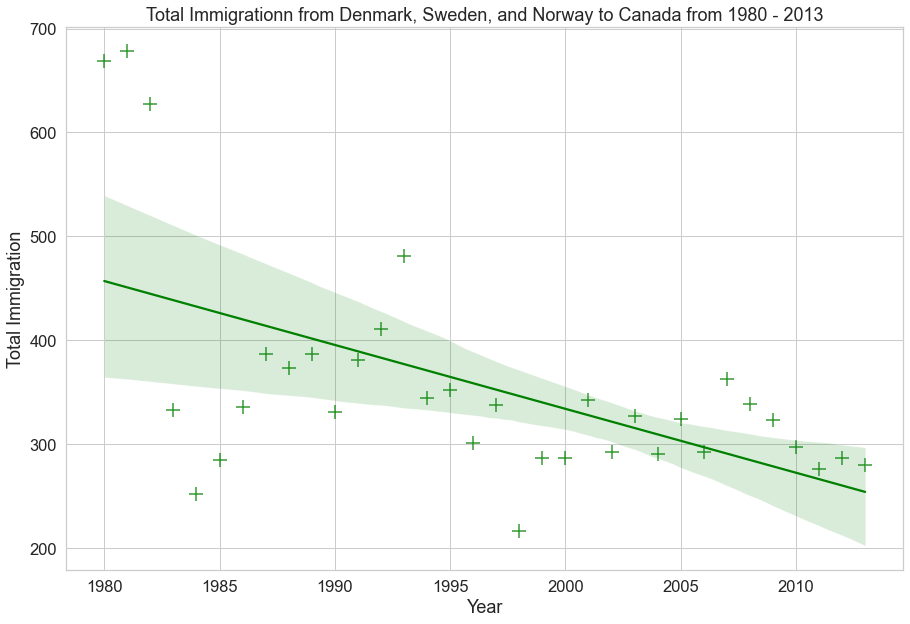

In [33]:
# create regression plot

# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='years', y='Total', data=df_dns, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

# Apply

## Definition
***
Apply digunakan pada dataframe mengaplikasikan suatu fungsi pada suatu dataframe columns

In [34]:
eg_df = df_canada[['1980','1981']].copy(deep=True)

## Mengaplikasikan kuadrat

### Cara 1

In [35]:
# Mengaplikasikan kuadrat
eg_df['C'] = eg_df['1980'].apply(lambda x:x**2)

### Cara 2

In [36]:
def square(num):
    return num**2

In [37]:
eg_df['D'] = eg_df['1980'].apply(square)

### Cara 3

In [38]:
eg_df['E'] = eg_df.apply(lambda x: square(x['1980']), axis=1)